In [1]:
import tensorflow as tf
from tensorflow.python.client import device_lib
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3953194073682209969
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 2915486926
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 11989733038156719574
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
 xla_global_id: 416903419]

In [3]:
tf.test.is_built_with_cuda()

True

In [2]:
import cv2 as cv
import SimpleITK as sitk

import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Concatenate, UpSampling2D, MaxPooling2D, BatchNormalization, AveragePooling2D, ReLU, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

import os 

from skimage import io
import random


from keras.models import Model, Sequential
from keras.layers import Activation, Dense, BatchNormalization, Dropout, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, Input, Reshape
from keras.callbacks import EarlyStopping
from keras import backend as K
from keras.optimizers import Adam, SGD
import tensorflow as tf
import numpy as np
import pandas as pd
import glob
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

***Importing the Data***

In [25]:
image_path = 'D:/faculty/4/Graduation_Project_ideas/7-medical dignoise/data/0-Data Sets/1- Training Data/ISIC-2017_Training_Data'
train = os.listdir(image_path)
len(train)

2000

In [26]:
ground_path = 'D:/faculty/4/Graduation_Project_ideas/7-medical dignoise/data/0-Data Sets/2- Trainig Ground Truth/1- binary mask png format/ISIC-2017_Training_Part1_GroundTruth'
train_gt = os.listdir(ground_path)
len(train_gt)

2000

In [27]:
test_path = 'D:/faculty/4/Graduation_Project_ideas/7-medical dignoise/data/0-Data Sets/5- Test Data/ISIC-2017_Test_v2_Data'
test= os.listdir(test_path)
len(test)

600

In [28]:
test_ground_path = 'D:/faculty/4/Graduation_Project_ideas/7-medical dignoise\data/0-Data Sets/6- Test Ground Truth/1/ISIC-2017_Test_v2_Part1_GroundTruth'
test_gt = os.listdir(test_ground_path)
len(test_gt)

600

In [29]:
val_path = 'D:/faculty/4/Graduation_Project_ideas/7-medical dignoise/data/0-Data Sets/3- Validation Data/ISIC-2017_Validation_Data'
val= os.listdir(val_path)
len(val)

150

In [30]:
val_path_gt = 'D:/faculty/4/Graduation_Project_ideas/7-medical dignoise/data/0-Data Sets/4- Validation Ground Truth/1/ISIC-2017_Validation_Part1_GroundTruth'
val_gt= os.listdir(val_path_gt)
len(val_gt)

150

***Visualizing the images***

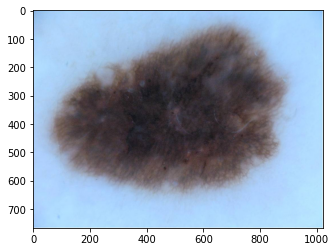

In [31]:
image_array=sitk.ReadImage(os.path.join(image_path,train[0]))           #reads the image
plt.imshow(sitk.GetArrayFromImage(image_array))                         #gets the array from that image
plt.show()

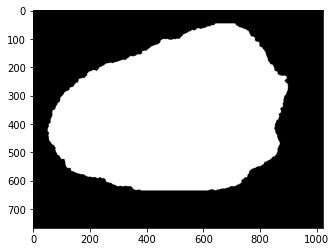

In [32]:
image_array2=cv.imread(os.path.join(ground_path,train_gt[0]))       #conversion to array in one step
plt.imshow(image_array2)
plt.show()

In [33]:
if not os.path.exists('D:/faculty/4/Graduation_Project_ideas/7-medical dignoise/data/Lesion'):
    try:
        os.mkdir('D:/faculty/4/Graduation_Project_ideas/7-medical dignoise/data/Lesion/')
        os.mkdir('D:/faculty/4/Graduation_Project_ideas/7-medical dignoise/data/Lesion/Training')
        os.mkdir('D:/faculty/4/Graduation_Project_ideas/7-medical dignoise/data/Lesion/Training_gt')
        os.mkdir('D:/faculty/4/Graduation_Project_ideas/7-medical dignoise/data/Lesion/Test')
        os.mkdir('D:/faculty/4/Graduation_Project_ideas/7-medical dignoise/data/Lesion/Test_gt')
        os.mkdir('D:/faculty/4/Graduation_Project_ideas/7-medical dignoise/data/Lesion/Val')
        os.mkdir('D:/faculty/4/Graduation_Project_ideas/7-medical dignoise/data/Lesion/Val_gt')
    except OSError:
        print ("Creation of the directory %s failed")
    else:
        print ("Successfully created the directory %s ")

In [1]:
img_size = 256

In [35]:
training_data=[]

def create_training_data():
    
    for images in train:     

        img=sitk.ReadImage(os.path.join(image_path,images))
        img_array=sitk.GetArrayFromImage(img)
        new_array=cv.resize(img_array,(img_size,img_size))
        
        io.imsave('D:/faculty/4/Graduation_Project_ideas/7-medical dignoise/data/Lesion/Training/' + images[:-4] + '.png', new_array) #change path location

        training_data.append([new_array])

create_training_data()  

In [ ]:
ground_truth_data=[]

def create_ground_truth_data():
    
    for images in train_gt:
        
        img = sitk.ReadImage(os.path.join(ground_path,images))
        img_array1= sitk.GetArrayFromImage(img)
        new_array1=cv.resize(img_array1,(img_size,img_size))
        
        io.imsave('D:/faculty/4/Graduation_Project_ideas/7-medical dignoise/data/Lesion/Training_gt/' + images[:-4] + '.png', new_array1) #change path location
        
        ground_truth_data.append([new_array1])
        
        
create_ground_truth_data()

In [ ]:
test_data=[]

def create_test_data():
    
    for images in test:
      
        img = sitk.ReadImage(os.path.join(test_path,images))
        img_array2 = sitk.GetArrayFromImage(img)
        new_array2=cv.resize(img_array2,(img_size,img_size))
        
        io.imsave('D:/faculty/4/Graduation_Project_ideas/7-medical dignoise/data/Lesion/Test/' + images[:-4] + '.png', new_array2) #change path location

        training_data.append([new_array2])
        

create_test_data() 

In [ ]:
test_GT_data=[]

def create_test_GT_data():
    
    for images in test_gt:
      
        img = sitk.ReadImage(os.path.join(test_ground_path,images))
        img_array3 = sitk.GetArrayFromImage(img)
        new_array3= cv.resize(img_array3,(img_size,img_size))
        
        io.imsave('D:/faculty/4/Graduation_Project_ideas/7-medical dignoise/data/Lesion/Test_gt/' + images[:-4] + '.png', new_array3) #change path location

        training_data.append([new_array3])
        

create_test_GT_data()  

In [ ]:
val_data=[]

def create_val_data():
    
    for images in val:
      
        img = sitk.ReadImage(os.path.join(val_path,images))
        img_array2 = sitk.GetArrayFromImage(img)
        new_array2=cv.resize(img_array2,(img_size,img_size))
        
        io.imsave('D:/faculty/4/Graduation_Project_ideas/7-medical dignoise/data/Lesion/Val/' + images[:-4] + '.png', new_array2) #change path location

        training_data.append([new_array2])    

create_val_data() 

In [ ]:
val_GT_data=[]

def create_val_GT_data():
    
    for images in val_gt:
      
        img = sitk.ReadImage(os.path.join(val_path_gt,images))
        img_array3 = sitk.GetArrayFromImage(img)
        new_array3= cv.resize(img_array3,(img_size,img_size))
        
        io.imsave('D:/faculty/4/Graduation_Project_ideas/7-medical dignoise/data/Lesion/Val_gt/' + images[:-4] + '.png', new_array3) #change path location

        training_data.append([new_array3])
        

create_val_GT_data() 

**Data Normalization and Generation** 

In [4]:
def loadDataTrain(df1, path1, path2):
    
    X1, y1 = [], []
    
    for i, item in df1.iterrows():
        
        img1 = sitk.ReadImage(path1 + item[0]+'.png')
        img = sitk.GetArrayFromImage(img1)/255.0               #image normalization
        
        mask = cv.imread(path2 + item[0]+'_segmentation.png')/255.0
            
        X1.append(img)                                         #appends the images
        y1.append(mask)                                        #appends the masks
            
    X1 = np.array(X1)
    y1 = np.array(y1)
    
    return X1,y1

In [5]:
def loadDataTest(df2, path3, path4):
    
    X2, y2 = [], []
    for i, item in df2.iterrows():
        
        img1 = sitk.ReadImage(path3 + item[0]+'.png')
        img = sitk.GetArrayFromImage(img1)/255.0
        
        mask = cv.imread(path4 + item[0]+'_segmentation.png')/255.0

        X2.append(img)
        y2.append(mask)
               
    X2 = np.array(X2)
    y2 = np.array(y2)
    
    return X2,y2

In [6]:
df1 = pd.read_csv('D:/faculty/4/Graduation_Project_ideas/7-medical dignoise/data/0-Data Sets/1- Training Data/ISIC-2017_Training_Data_metadata.csv')   
df1.head()

,image_id,age_approximate,sex
0,ISIC_0000000,55,female
1,ISIC_0000001,30,female
2,ISIC_0000002,60,female
3,ISIC_0000003,30,male
4,ISIC_0000004,80,male


In [7]:
df1 = df1.sample(frac=1, random_state=23)

In [8]:
df2= pd.read_csv('D:/faculty/4/Graduation_Project_ideas/7-medical dignoise/data/0-Data Sets/5- Test Data/ISIC-2017_Test_v2_Data_metadata.csv')
df2.head()

,image_id,age_approximate,sex
0,ISIC_0012086,30,male
1,ISIC_0012092,40,male
2,ISIC_0012095,25,male
3,ISIC_0012134,75,female
4,ISIC_0012136,70,male


In [9]:
df2 = df2.sample(frac=1, random_state=23)

In [10]:
path1 = 'D:/faculty/4/Graduation_Project_ideas/7-medical dignoise/data/Lesion/Training/'
path2 = 'D:/faculty/4/Graduation_Project_ideas/7-medical dignoise/data/Lesion/Training_gt/'

path3 = 'D:/faculty/4/Graduation_Project_ideas/7-medical dignoise/data/Lesion/Test/'
path4 = 'D:/faculty/4/Graduation_Project_ideas/7-medical dignoise/data/Lesion/Test_gt/'

**Creating X train/test and Y train/test data**

In [11]:
X_train, y_train = loadDataTrain(df1, path1, path2)

In [12]:
X_test, y_test = loadDataTest(df2, path3, path4)

In [13]:
X_train.shape

(2000, 256, 256, 3)

In [14]:
y_train.shape

(2000, 256, 256, 3)

In [15]:
X_test.shape

(600, 256, 256, 3)

In [16]:
y_test.shape

(600, 256, 256, 3)

***Visualizing Data after Processing***

In [17]:
r = random.randint(0, len(X_train)-1)

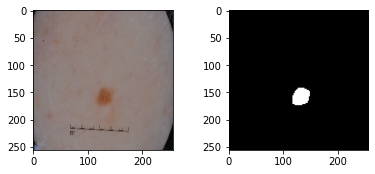

In [18]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(1, 2, 1)
ax.imshow(X_train[r])
ax = fig.add_subplot(1, 2, 2)
ax.imshow(y_train[r])

In [19]:
r = random.randint(0, len(X_train)-1)

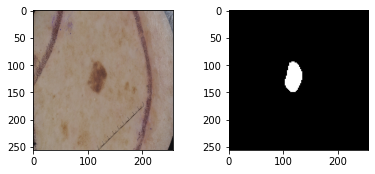

In [20]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(1, 2, 1)
ax.imshow(X_train[r])
ax = fig.add_subplot(1, 2, 2)
ax.imshow(y_train[r])

In [21]:
def convolution_operation(entered_input, filters=64):
    conv1 = Conv2D(filters, kernel_size = (1,1), padding = "same")(entered_input)
    print(conv1)
    conv2 = Conv2D(filters, kernel_size = (3,3), padding = "same")(conv1)
    print(conv2,)
    return conv2  

In [22]:
def encoder(l, entered_input, filters=64):
    for i in range (l):
          enc1 = convolution_operation(entered_input, filters)
    #transition_layer
    conv1 = Conv2D(filters=128, kernel_size = (1,1), padding = "same")(enc1)
    AvgPooling = AveragePooling2D(pool_size=(2,2),strides = (2,2))(conv1)
    return enc1, AvgPooling 

In [23]:
def convolution_operation2(entered_input, filters):
    conv3 = Conv2D(filters, kernel_size = (3,3), padding = "same")(entered_input)
    bn = BatchNormalization()(conv3)
    relu = ReLU()(bn)
    return relu

In [24]:
def decoder(entered_input, skip, filters):
    # Upsampling and concatenating the essential features
    Upsample = UpSampling2D(size =(2,2))(entered_input)
    Upsample = convolution_operation2(Upsample,filters)
    Connect_Skip = Concatenate()([Upsample, skip])
    conv_BN_Relu = convolution_operation2(Connect_Skip, filters)
    return conv_BN_Relu

In [25]:
def U_Net():
    # Take the image size and shape
    input1 = Input((256,256,3))
    conv7_7 = Conv2D(32, kernel_size = (7,7),strides=(2,2), padding = "same")(input1)
    maxPooling = MaxPooling2D(pool_size=(3,3),strides = (2,2),padding='same')(conv7_7)
    # Construct the encoder blocks
    skip1, encoder_1 = encoder(6, maxPooling, 64)
    skip2, encoder_2 = encoder(12, encoder_1, 64*2)
    skip3, encoder_3 = encoder(48, encoder_2, 64*4)
    ##bottle neck
    for i in range(32):
       encoder_4 = convolution_operation(encoder_3, 64*8)
    # Construct the decoder blocks
    decoder_1 = decoder(encoder_4, skip3, 512 )
    decoder_2 = decoder(decoder_1, skip2, 256)
    decoder_3 = decoder(decoder_2, skip1, 96)
    decoder_4 = decoder(decoder_3, conv7_7, 96)
    decoder_5 = decoder(decoder_4, input1, 64)
    ###OUTPUT LAYER
    output = Conv2D(3,(1,1),padding='same',activation="sigmoid")(decoder_5)
    model = Model(input1, output)
    return model

In [26]:
model = U_Net()

KerasTensor(type_spec=TensorSpec(shape=(None, 64, 64, 64), dtype=tf.float32, name=None), name='conv2d_1/BiasAdd:0', description="created by layer 'conv2d_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 64, 64, 64), dtype=tf.float32, name=None), name='conv2d_2/BiasAdd:0', description="created by layer 'conv2d_2'")
KerasTensor(type_spec=TensorSpec(shape=(None, 64, 64, 64), dtype=tf.float32, name=None), name='conv2d_3/BiasAdd:0', description="created by layer 'conv2d_3'")
KerasTensor(type_spec=TensorSpec(shape=(None, 64, 64, 64), dtype=tf.float32, name=None), name='conv2d_4/BiasAdd:0', description="created by layer 'conv2d_4'")
KerasTensor(type_spec=TensorSpec(shape=(None, 64, 64, 64), dtype=tf.float32, name=None), name='conv2d_5/BiasAdd:0', description="created by layer 'conv2d_5'")
KerasTensor(type_spec=TensorSpec(shape=(None, 64, 64, 64), dtype=tf.float32, name=None), name='conv2d_6/BiasAdd:0', description="created by layer 'conv2d_6'")
KerasTensor(type_spec=TensorSpec(shape=(None, 

KerasTensor(type_spec=TensorSpec(shape=(None, 16, 16, 256), dtype=tf.float32, name=None), name='conv2d_54/BiasAdd:0', description="created by layer 'conv2d_54'")
KerasTensor(type_spec=TensorSpec(shape=(None, 16, 16, 256), dtype=tf.float32, name=None), name='conv2d_55/BiasAdd:0', description="created by layer 'conv2d_55'")
KerasTensor(type_spec=TensorSpec(shape=(None, 16, 16, 256), dtype=tf.float32, name=None), name='conv2d_56/BiasAdd:0', description="created by layer 'conv2d_56'")
KerasTensor(type_spec=TensorSpec(shape=(None, 16, 16, 256), dtype=tf.float32, name=None), name='conv2d_57/BiasAdd:0', description="created by layer 'conv2d_57'")
KerasTensor(type_spec=TensorSpec(shape=(None, 16, 16, 256), dtype=tf.float32, name=None), name='conv2d_58/BiasAdd:0', description="created by layer 'conv2d_58'")
KerasTensor(type_spec=TensorSpec(shape=(None, 16, 16, 256), dtype=tf.float32, name=None), name='conv2d_59/BiasAdd:0', description="created by layer 'conv2d_59'")
KerasTensor(type_spec=Tensor

KerasTensor(type_spec=TensorSpec(shape=(None, 16, 16, 256), dtype=tf.float32, name=None), name='conv2d_108/BiasAdd:0', description="created by layer 'conv2d_108'")
KerasTensor(type_spec=TensorSpec(shape=(None, 16, 16, 256), dtype=tf.float32, name=None), name='conv2d_109/BiasAdd:0', description="created by layer 'conv2d_109'")
KerasTensor(type_spec=TensorSpec(shape=(None, 16, 16, 256), dtype=tf.float32, name=None), name='conv2d_110/BiasAdd:0', description="created by layer 'conv2d_110'")
KerasTensor(type_spec=TensorSpec(shape=(None, 16, 16, 256), dtype=tf.float32, name=None), name='conv2d_111/BiasAdd:0', description="created by layer 'conv2d_111'")
KerasTensor(type_spec=TensorSpec(shape=(None, 16, 16, 256), dtype=tf.float32, name=None), name='conv2d_112/BiasAdd:0', description="created by layer 'conv2d_112'")
KerasTensor(type_spec=TensorSpec(shape=(None, 16, 16, 256), dtype=tf.float32, name=None), name='conv2d_113/BiasAdd:0', description="created by layer 'conv2d_113'")
KerasTensor(type

KerasTensor(type_spec=TensorSpec(shape=(None, 8, 8, 512), dtype=tf.float32, name=None), name='conv2d_165/BiasAdd:0', description="created by layer 'conv2d_165'")
KerasTensor(type_spec=TensorSpec(shape=(None, 8, 8, 512), dtype=tf.float32, name=None), name='conv2d_166/BiasAdd:0', description="created by layer 'conv2d_166'")
KerasTensor(type_spec=TensorSpec(shape=(None, 8, 8, 512), dtype=tf.float32, name=None), name='conv2d_167/BiasAdd:0', description="created by layer 'conv2d_167'")
KerasTensor(type_spec=TensorSpec(shape=(None, 8, 8, 512), dtype=tf.float32, name=None), name='conv2d_168/BiasAdd:0', description="created by layer 'conv2d_168'")
KerasTensor(type_spec=TensorSpec(shape=(None, 8, 8, 512), dtype=tf.float32, name=None), name='conv2d_169/BiasAdd:0', description="created by layer 'conv2d_169'")
KerasTensor(type_spec=TensorSpec(shape=(None, 8, 8, 512), dtype=tf.float32, name=None), name='conv2d_170/BiasAdd:0', description="created by layer 'conv2d_170'")
KerasTensor(type_spec=Tensor

In [27]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 1e-4),loss="binary_crossentropy",metrics=["accuracy"])

In [28]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 32  4736        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 64, 64, 32)   0           ['conv2d[0][0]']                 
                                                                                              

                                                                                                  
 batch_normalization_4 (BatchNo  (None, 64, 64, 96)  384         ['conv2d_204[0][0]']             
 rmalization)                                                                                     
                                                                                                  
 re_lu_4 (ReLU)                 (None, 64, 64, 96)   0           ['batch_normalization_4[0][0]']  
                                                                                                  
 concatenate_2 (Concatenate)    (None, 64, 64, 160)  0           ['re_lu_4[0][0]',                
                                                                  'conv2d_12[0][0]']              
                                                                                                  
 conv2d_205 (Conv2D)            (None, 64, 64, 96)   138336      ['concatenate_2[0][0]']          
          

**Training the Model**

In [27]:
train_gen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rescale=1.,
    zoom_range=0.2,
    fill_mode='nearest',
    cval=0
)


test_gen = ImageDataGenerator(rescale=1.)

In [28]:
train_gen.fit(X_train)

In [ ]:
batch_size=5
r = model.fit(
    train_gen.flow(X_train, y_train,batch_size=5),
    validation_data=test_gen.flow(X_test, y_test,batch_size=5),
    steps_per_epoch=len(X_train) // batch_size,
    epochs = 100,
    validation_steps=(len(X_test)) // batch_size,
)

Epoch 1/100


In [35]:
def segnet(epochs_num,savename):

    # Encoding layer
    img_input = Input(shape= (256, 256, 3))
    x = Conv2D(64, (3, 3), padding='same', name='conv1',strides= (1,1))(img_input)
    x = BatchNormalization(name='bn1')(x)
    x = Activation('relu')(x)
    x = Conv2D(64, (3, 3), padding='same', name='conv2')(x)
    x = BatchNormalization(name='bn2')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)
    
    x = Conv2D(128, (3, 3), padding='same', name='conv3')(x)
    x = BatchNormalization(name='bn3')(x)
    x = Activation('relu')(x)
    x = Conv2D(128, (3, 3), padding='same', name='conv4')(x)
    x = BatchNormalization(name='bn4')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)

    x = Conv2D(256, (3, 3), padding='same', name='conv5')(x)
    x = BatchNormalization(name='bn5')(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (3, 3), padding='same', name='conv6')(x)
    x = BatchNormalization(name='bn6')(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (3, 3), padding='same', name='conv7')(x)
    x = BatchNormalization(name='bn7')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)

    x = Conv2D(512, (3, 3), padding='same', name='conv8')(x)
    x = BatchNormalization(name='bn8')(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding='same', name='conv9')(x)
    x = BatchNormalization(name='bn9')(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding='same', name='conv10')(x)
    x = BatchNormalization(name='bn10')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)
    
    x = Conv2D(512, (3, 3), padding='same', name='conv11')(x)
    x = BatchNormalization(name='bn11')(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding='same', name='conv12')(x)
    x = BatchNormalization(name='bn12')(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding='same', name='conv13')(x)
    x = BatchNormalization(name='bn13')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)

    x = Dense(1024, activation = 'relu', name='fc1')(x)
    x = Dense(1024, activation = 'relu', name='fc2')(x)
    
    # Decoding Layer 
    x = UpSampling2D()(x)
    x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv1')(x)
    x = BatchNormalization(name='bn14')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv2')(x)
    x = BatchNormalization(name='bn15')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv3')(x)
    x = BatchNormalization(name='bn16')(x)
    x = Activation('relu')(x)
    
    x = UpSampling2D()(x)
    x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv4')(x)
    x = BatchNormalization(name='bn17')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(512, (3, 3), padding='same', name='deconv5')(x)
    x = BatchNormalization(name='bn18')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(256, (3, 3), padding='same', name='deconv6')(x)
    x = BatchNormalization(name='bn19')(x)
    x = Activation('relu')(x)

    x = UpSampling2D()(x)
    x = Conv2DTranspose(256, (3, 3), padding='same', name='deconv7')(x)
    x = BatchNormalization(name='bn20')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(256, (3, 3), padding='same', name='deconv8')(x)
    x = BatchNormalization(name='bn21')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(128, (3, 3), padding='same', name='deconv9')(x)
    x = BatchNormalization(name='bn22')(x)
    x = Activation('relu')(x)

    x = UpSampling2D()(x)
    x = Conv2DTranspose(128, (3, 3), padding='same', name='deconv10')(x)
    x = BatchNormalization(name='bn23')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(64, (3, 3), padding='same', name='deconv11')(x)
    x = BatchNormalization(name='bn24')(x)
    x = Activation('relu')(x)
    
    x = UpSampling2D()(x)
    x = Conv2DTranspose(64, (3, 3), padding='same', name='deconv12')(x)
    x = BatchNormalization(name='bn25')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(1, (3, 3), padding='same', name='deconv13')(x)
    x = BatchNormalization(name='bn26')(x)
    x = Activation('sigmoid')(x)
    ###pred = Reshape((256,256))(x)
    
    model = Model(inputs=img_input, outputs=x)
    
    model.compile(optimizer= SGD(lr=0.001, momentum=0.9, decay=0.0005, nesterov=False), loss= ["binary_crossentropy"]
                  , metrics=['accuracy'])
    
    model.summary()
    batch_size=5
    hist = model.fit(
        train_gen.flow(X_train, y_train,batch_size=5),
        validation_data=test_gen.flow(X_test, y_test,batch_size=5),
        epochs= epochs_num,
        verbose=1,
        steps_per_epoch=len(X_train) // batch_size,
        validation_steps=(len(X_test)) // batch_size,
    )
    
    model.save(savename)
    return model,hist

In [36]:
model, hist = segnet(epochs_num= 100, savename= 'segnet_100_epoch.h5')

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 256, 256, 64)      1792      
                                                                 
 bn1 (BatchNormalization)    (None, 256, 256, 64)      256       
                                                                 
 activation_78 (Activation)  (None, 256, 256, 64)      0         
                                                                 
 conv2 (Conv2D)              (None, 256, 256, 64)      36928     
                                                                 
 bn2 (BatchNormalization)    (None, 256, 256, 64)      256       
                                                                 
 activation_79 (Activation)  (None, 256, 256, 64)      0   

 g2D)                                                            
                                                                 
 deconv4 (Conv2DTranspose)   (None, 32, 32, 512)       2359808   
                                                                 
 bn17 (BatchNormalization)   (None, 32, 32, 512)       2048      
                                                                 
 activation_94 (Activation)  (None, 32, 32, 512)       0         
                                                                 
 deconv5 (Conv2DTranspose)   (None, 32, 32, 512)       2359808   
                                                                 
 bn18 (BatchNormalization)   (None, 32, 32, 512)       2048      
                                                                 
 activation_95 (Activation)  (None, 32, 32, 512)       0         
                                                                 
 deconv6 (Conv2DTranspose)   (None, 32, 32, 256)       1179904   
          

400/400 [==============================] - 294s 734ms/step - loss: 0.1714 - accuracy: 0.9344 - val_loss: 0.3223 - val_accuracy: 0.8681
Epoch 79/100
400/400 [==============================] - 297s 741ms/step - loss: 0.1753 - accuracy: 0.9329 - val_loss: 0.2720 - val_accuracy: 0.8888
Epoch 80/100
400/400 [==============================] - 294s 734ms/step - loss: 0.1749 - accuracy: 0.9333 - val_loss: 0.3214 - val_accuracy: 0.8696
Epoch 81/100
400/400 [==============================] - 296s 741ms/step - loss: 0.1706 - accuracy: 0.9354 - val_loss: 0.3264 - val_accuracy: 0.8696
Epoch 82/100
400/400 [==============================] - 291s 727ms/step - loss: 0.1733 - accuracy: 0.9337 - val_loss: 0.2888 - val_accuracy: 0.8831
Epoch 83/100
400/400 [==============================] - 290s 724ms/step - loss: 0.1703 - accuracy: 0.9347 - val_loss: 0.2988 - val_accuracy: 0.8803
Epoch 84/100
400/400 [==============================] - 293s 732ms/step - loss: 0.1704 - accuracy: 0.9349 - val_loss: 0.2845 

In [38]:
model.load_weights('segnet_100_epoch.h5')

**Plotting Training Statistics**

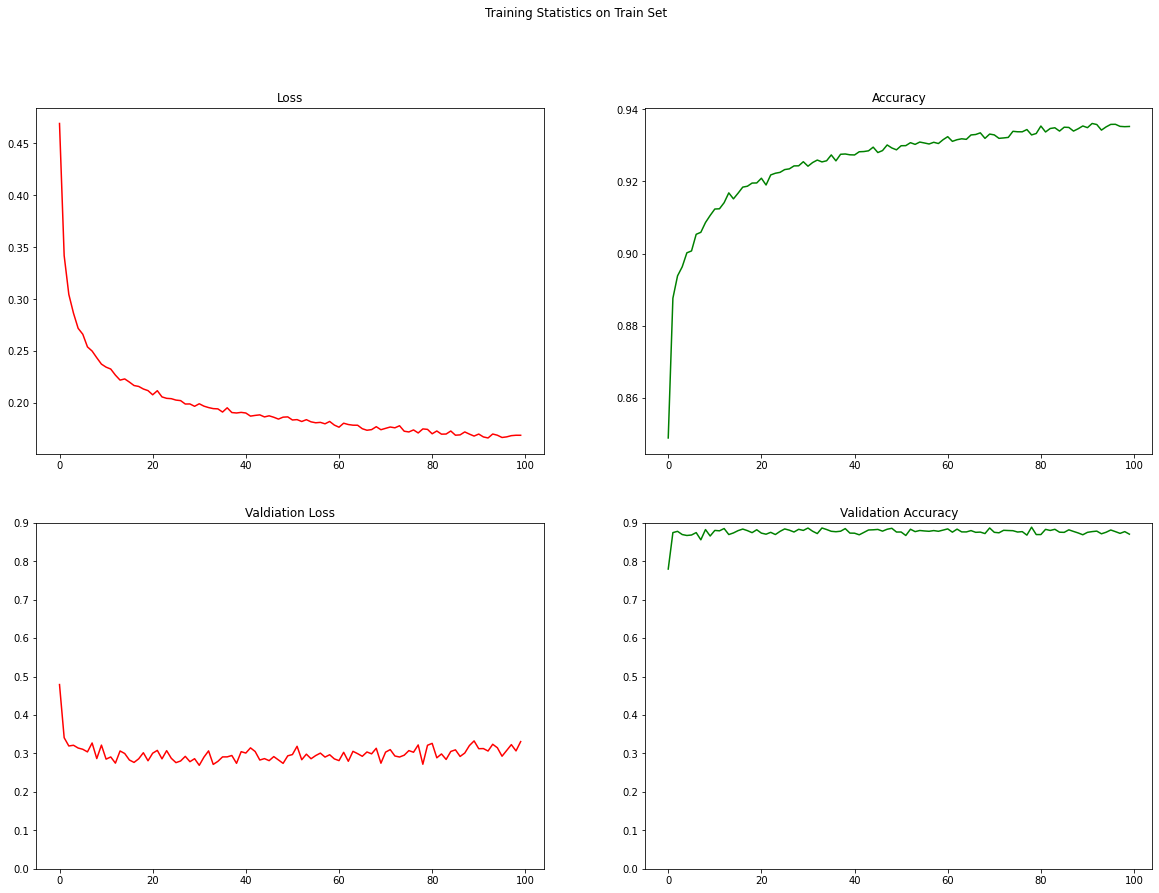

In [40]:
plt.figure(figsize=(20, 14))
plt.suptitle('Training Statistics on Train Set')
plt.subplot(2,2,1)
plt.plot(hist.history['loss'], 'red')
plt.title('Loss')
plt.subplot(2,2,2)
plt.plot(hist.history['accuracy'], 'green')
plt.title('Accuracy')
plt.subplot(2,2,3)
plt.plot(hist.history['val_loss'], 'red')
plt.yticks(list(np.arange(0.0, 1.0, 0.10)))
plt.title('Valdiation Loss')
plt.subplot(2,2,4)
plt.plot(hist.history['val_accuracy'], 'green')
plt.yticks(list(np.arange(0.0, 1.0, 0.10)))
plt.title('Validation Accuracy')
plt.show()

In [41]:
predict_path_raw = 'D:/faculty/4/Graduation_Project_ideas/7-medical dignoise/data\Lesion/Val/'
predict_path_mask= 'D:/faculty/4/Graduation_Project_ideas/7-medical dignoise/data/Lesion/Val_gt/'

predict_raw = os.listdir(predict_path_raw)

predict_mask = os.listdir(predict_path_mask)

1/1 [==============================] - 0s 149ms/step


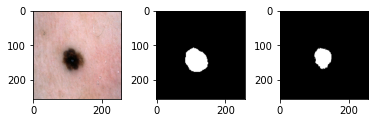

In [48]:
# run this cell several times. each time you should see a new image and its results

m = random.randint(0, len(predict_raw)-1)

img_raw=sitk.ReadImage(os.path.join(predict_path_raw,predict_raw[m]))
img_array_raw= sitk.GetArrayFromImage(img_raw)
img_array_raw=img_array_raw/255.0

testing=np.expand_dims(img_array_raw, axis=0)

img_array_mask=cv.imread(os.path.join(predict_path_mask,predict_mask[m]))
img_array_mask=img_array_mask/255.0


result= model.predict(testing)               # used to predict the result
result=result>0.5
predict_result =np.squeeze(result,axis=0)

fig = plt.figure()                                # plotting the results
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 3, 1)                     # the original validation image
ax.imshow(img_array_raw)

ax = fig.add_subplot(1, 3, 2)                     # the ground truth provided
ax.imshow(img_array_mask, cmap="gray")

ax = fig.add_subplot(1, 3, 3)                     # segmentation predicted by our neural net model
ax.imshow(predict_result*255, cmap="gray")

1/1 [==============================] - 0s 152ms/step


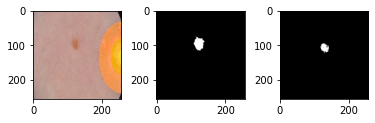

In [51]:
# run this cell several times. each time you should see a new image and its results

m = random.randint(0, len(predict_raw)-1)

img_raw=sitk.ReadImage(os.path.join(predict_path_raw,predict_raw[m]))
img_array_raw= sitk.GetArrayFromImage(img_raw)
img_array_raw=img_array_raw/255.0

testing=np.expand_dims(img_array_raw, axis=0)

img_array_mask=cv.imread(os.path.join(predict_path_mask,predict_mask[m]))
img_array_mask=img_array_mask/255.0


result= model.predict(testing)               # used to predict the result
result=result>0.5
predict_result =np.squeeze(result,axis=0)

fig = plt.figure()                                # plotting the results
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 3, 1)                     # the original validation image
ax.imshow(img_array_raw)

ax = fig.add_subplot(1, 3, 2)                     # the ground truth provided
ax.imshow(img_array_mask, cmap="gray")

ax = fig.add_subplot(1, 3, 3)                     # segmentation predicted by our neural net model
ax.imshow(predict_result*255, cmap="gray")

1/1 [==============================] - 0s 155ms/step


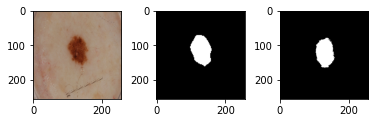

In [53]:
# run this cell several times. each time you should see a new image and its results

m = random.randint(0, len(predict_raw)-1)

img_raw=sitk.ReadImage(os.path.join(predict_path_raw,predict_raw[m]))
img_array_raw= sitk.GetArrayFromImage(img_raw)
img_array_raw=img_array_raw/255.0

testing=np.expand_dims(img_array_raw, axis=0)

img_array_mask=cv.imread(os.path.join(predict_path_mask,predict_mask[m]))
img_array_mask=img_array_mask/255.0


result= model.predict(testing)               # used to predict the result
result=result>0.5
predict_result =np.squeeze(result,axis=0)

fig = plt.figure()                                # plotting the results
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 3, 1)                     # the original validation image
ax.imshow(img_array_raw)

ax = fig.add_subplot(1, 3, 2)                     # the ground truth provided
ax.imshow(img_array_mask, cmap="gray")

ax = fig.add_subplot(1, 3, 3)                     # segmentation predicted by our neural net model
ax.imshow(predict_result*255, cmap="gray")

In [54]:
model_json = model.to_json()

In [55]:
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [18]:
from tensorflow import keras

m = keras.models.load_model("segnet_100_epoch.h5")

In [19]:
losse = pd.DataFrame(m.history.history)
losse.head()

AttributeError: 'NoneType' object has no attribute 'history'